# Bike Sharing in Washington DC

### About the project

Rental bikes in 2011 and 2012 with corresponding weather and seasonal information. 
The goal is to forecast bike rental demand of Bike sharing program in Washington, D.C based on historical usage patterns in relation with weather, time and other data.
Using these Bike Sharing systems, people rent a bike from one location and return it to a different or same place on need basis. People can rent a bike through membership (mostly regular users) or on demand basis (mostly casual users). This process is controlled by a network of automated kiosk across the city.

### About the Data Set
The dataset shows hourly rental data for two years (2011 and 2012). The training data set is for the first 19 days of each month. The test dataset is from 20th day to month’s end. We are required to predict the total count of bikes rented during each hour covered by the test set.
In the training data set, they have separately given bike demand by registered, casual users and sum of both is given as count.
Training data set has 12 variables (see below) and Test has 9 (excluding registered, casual and count).

#### Data Dictionary :
1. datetime: Date
2. season: Season (1:spring, 2:summer, 3:fall, 4:winter)
3. holiday: weather day is holiday or not (extracted from Holiday Schedule)
4. workingday: If day is neither weekend nor holiday is 1, otherwise is 0.
5. weather: (extracted from Freemeteo)
        1: Clear, Few clouds, Partly cloudy, Partly cloudy
        2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
        3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
        4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
6. temp: Normalized temperature in Celsius. The values are derived via (t-tmin)/(tmax-tmin), tmin=-8, t_max=+39 (only in hourly scale)
7. atemp: Normalized feeling temperature in Celsius. The values are derived via (t-tmin)/(tmax-tmin), tmin=-16, t_max=+50 (only in hourly scale)
8. humidity: Normalized humidity. The values are divided to 100 (max)
9. windspeed: Normalized wind speed. The values are divided to 67 (max)
10. casual: count of casual users
11. registered: count of registered users
12. cnt: count of total rental bikes including both casual and registered

#### Importing Data set and Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns


In [2]:
#importing train and test data
train = pd.read_csv('C:/Users/Goels/Downloads/Bike-Sharing-Demand-main/Bike-Sharing-Demand-main/train.csv')
test = pd.read_csv('C:/Users/Goels/Downloads/Bike-Sharing-Demand-main/Bike-Sharing-Demand-main/test.csv')

In [3]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [5]:
#checking dimensions of data
train.shape

(10886, 12)

In [6]:
test.shape

(6493, 9)

There are 10,886 rows and 12 features in our training data set. Whereas, 6493 rows in our test data set. 

In [7]:
#Variable Type Identification
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [8]:
# checking for missing values
train.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

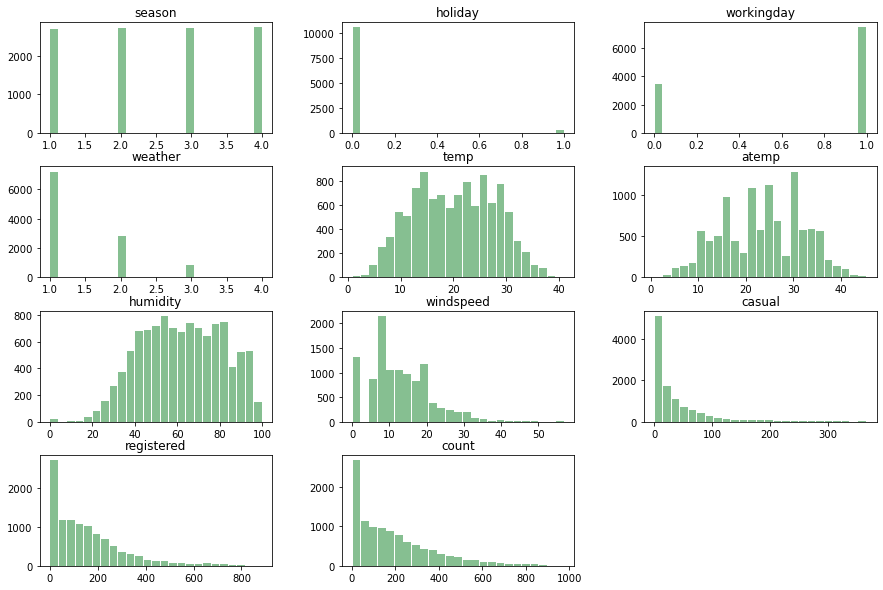

In [9]:
# distribution of numerical variables and generate a frequency table for numeric variables.
ax = train.hist(bins=25, grid= False, figsize=(15,10), color='#86bf91', zorder=2, rwidth=0.9)

In [10]:
train['workingday'].value_counts(normalize=True)
#68% of hours were working hours

1    0.680875
0    0.319125
Name: workingday, dtype: float64

In [11]:
train['season'].value_counts(normalize=True)
#all seasons have a similar attendance
# Season (1:spring, 2:summer, 3:fall, 4:winter)


4    0.251148
2    0.251056
3    0.251056
1    0.246739
Name: season, dtype: float64

In [12]:
train['weather'].value_counts(normalize=True)
#most rentals were observed in clear weather with 66%, followed by mist/cloudy weather with 26% and 
#very few rentals took place when there was rain/snow

1    0.660665
2    0.260334
3    0.078909
4    0.000092
Name: weather, dtype: float64

### Key Inferences
1) <b> Season </b> has 4 categories of almost equal distribution. <br>
2) <b>Clear Weather</b> has the <b>highest contribution</b> (i.e. 66% Cases for Weather (Category = 1)). 
Most rentals were observed in clear weather followed by mist/cloudy weather with 26% and very few rentals took place when there was rain/snow.<br> 
3) <b>Variables temp, atemp, humidity and windspeed</b>  looks naturally distributed.<br>
4) <b>Most bike rentals</b> were taking place during the <b>working hours</b> (68%)

#### For Datetime Column

In [13]:
#converting datetime column to datetime format
train['datetime'] = train['datetime'].apply(pd.to_datetime)
test['datetime'] = test['datetime'].apply(pd.to_datetime)

In [14]:
# We don’t have the variable ‘hour’ with us right now. But we can extract it using the datetime column. 
# Extracting hours from datetime column and creating a separate column
train['hour']=train['datetime'].dt.hour
test['hour']=test['datetime'].dt.hour

In [15]:
# Extracting years from datetime column and creating a separate column
train['year']=train['datetime'].dt.year
test['year']=test['datetime'].dt.year

In [16]:
#extracting day of week from datetime column and creating a separate column
train['day']=train['datetime'].dt.day_name()
test['day']=test['datetime'].dt.day_name()

In [17]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,year,day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,2011,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,2011,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,2011,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,2011,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,2011,Saturday


In [18]:
#dropping datetime from datasets
train=train.drop('datetime',axis=1)
test=test.drop('datetime',axis=1)

In [19]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,year,day
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,2011,Saturday
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,2011,Saturday
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,2011,Saturday
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,2011,Saturday
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,2011,Saturday


#### Studying the Day Wise Bike Rental Distribution 

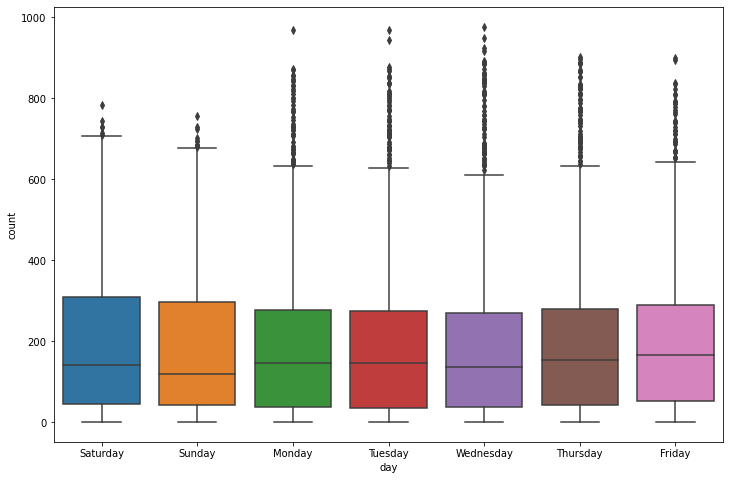

In [20]:
plt.figure(figsize=(12,8))
sns.boxplot(train['day'],train['count'])


#### Key Inferences : 
1) <b>Highest bike rentals</b> were observed on <b>Saturdays</b> followed by Sundays and Fridays.<br>
2) We also observe that the <b>number of outliers</b> increases as we approach the <b>weekend</b>. <br>
Let us look at the distibution separately for casual and registered users. 

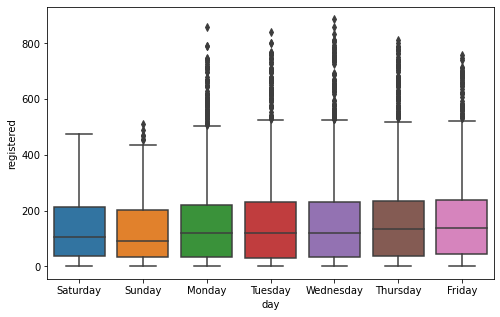

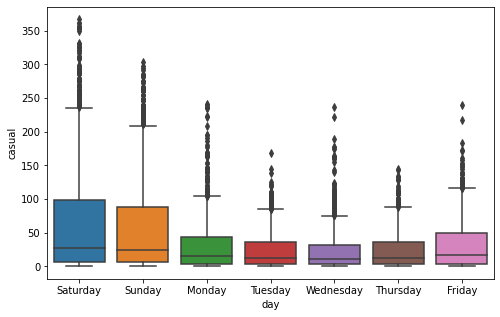

In [21]:
plt.figure(figsize=(8,5))
sns.boxplot(train['day'],train['registered'])
plt.figure(figsize=(8,5))
sns.boxplot(train['day'],train['casual'])


#### Key Observation : 
We observe that most of the casual users use bike rentals on weekend whereas registered users follow a similar distribution on all days and are regular bike rental buyers.

#### Studying the Hour Wise Bike Rental Distribution 

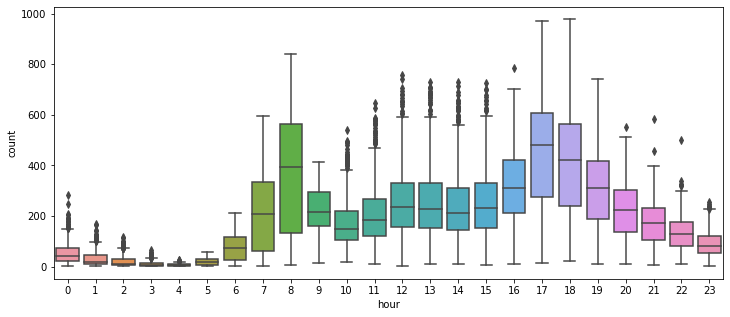

In [22]:
plt.figure(figsize=(12,5))
sns.boxplot(train['hour'],train['count'])

#### Key Inference  : We observe a trend in bike rentals when ploteed against hours of the day. 

We can divide them into 3 categories and we get : <br>
<b>High Demand</b>    : 7-8 am and 5-6 pm<br>
<b>Average Demand</b> : 12-2 pm hours<br>
<b>Low Demand</b>     : 1- 6 am and 9 pm onwards<br><br>
<b> Here is the distribution of registered and casual users separately.</b>

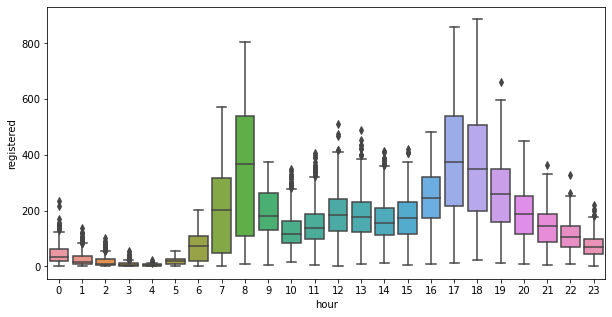

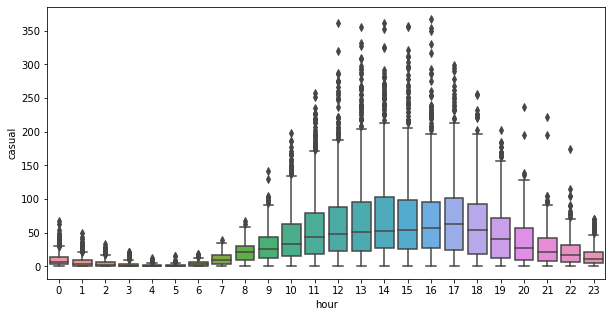

In [23]:
plt.figure(figsize=(10,5))
sns.boxplot(train['hour'],train['registered'])
plt.figure(figsize=(10,5))
sns.boxplot(train['hour'],train['casual'])

#### Key Inference : Registered users have similar trend as count. While casual users have a slightly different trend. It might be possible that hour is an important feature in predicting bike demand. 

#### Studying the Year Wise Bike Rental Distribution 

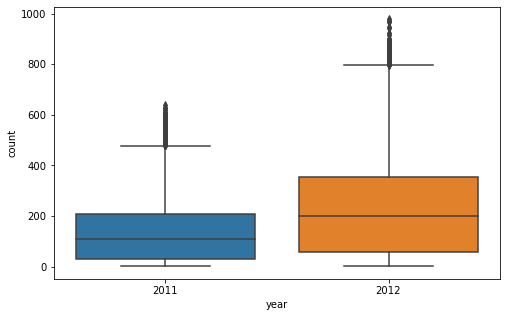

In [24]:
plt.figure(figsize=(8,5))
sns.boxplot(train['year'],train['count'])

#### Key Inference : The bike rental demands were high in 2012 as compared to 2011.

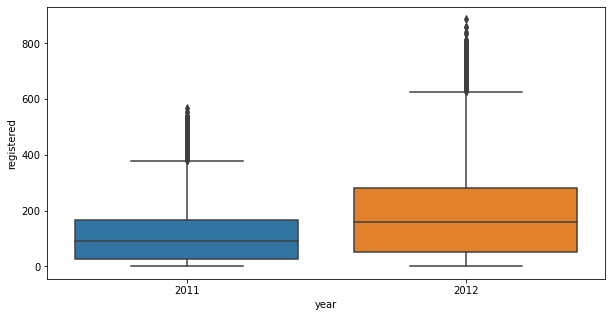

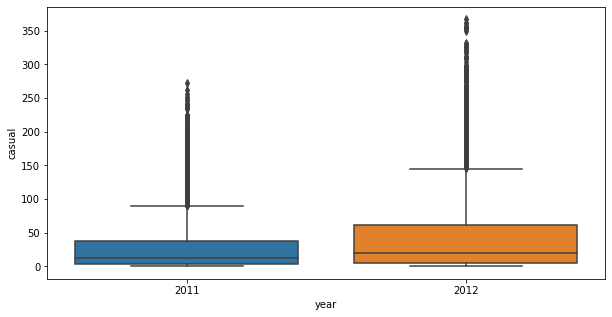

In [25]:
plt.figure(figsize=(10,5))
sns.boxplot(train['year'],train['registered'])
plt.figure(figsize=(10,5))
sns.boxplot(train['year'],train['casual'])

#### Key Inference : Casual users have similar bike rental demand for both years 2011 and 2012.  Whereas, the number of registered users have increased in the year 2012 with the maximum users exceeding significantly from 2011. 



### Correlations
#### Relation amongst different features

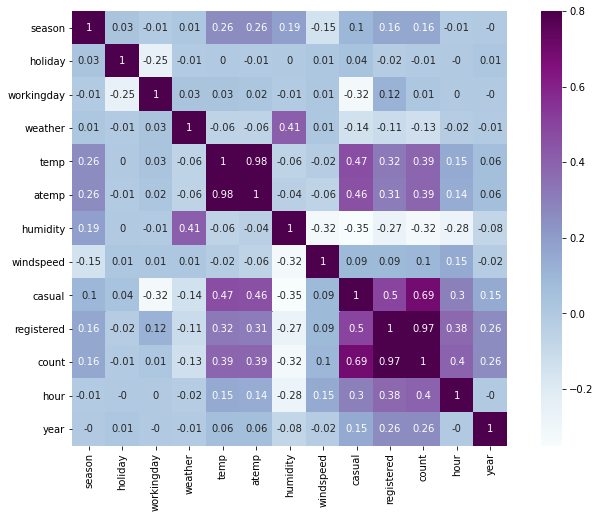

In [26]:
plt.figure(figsize=(12,8))
matrix=round(train.corr(), 2)
sns.heatmap(matrix,vmax=0.8,square=True,cmap='BuPu',annot=True)

#### Key Inferences : 
1.The bike rental demand count and registered users are strongly positively associated. <br>
2.The bike rental demand count and humidity are negatively associated. <br>
3.The bike rental demand count is positively associated with hour. <br>
4.Windspeed has lower correlation as compared to temp, season and humidity. <br>


### Feature Engineering

In addition to existing independent variables, we will create new variables to improve the prediction power of model. 

In [27]:
#converting day to numerical dtype
train['day']=train['day'].astype('category')
train['day']=train['day'].cat.codes

test['day']=test['day'].astype('category')
test['day']=test['day'].cat.codes

In [28]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,year,day
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,2011,2
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,2011,2
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,2011,2
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,2011,2
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,2011,2


In [29]:
#creating bins of hours column
bins = [-1,4,8,12,16,20,23]
labels = [1,2,3,4,5,6]
train['hour_binned']=pd.cut(train['hour'],bins=bins,labels=labels)
test['hour_binned']=pd.cut(test['hour'],bins=bins,labels=labels)

In [30]:
#dropping hour column
train=train.drop('hour',axis=1)
test=test.drop('hour',axis=1)

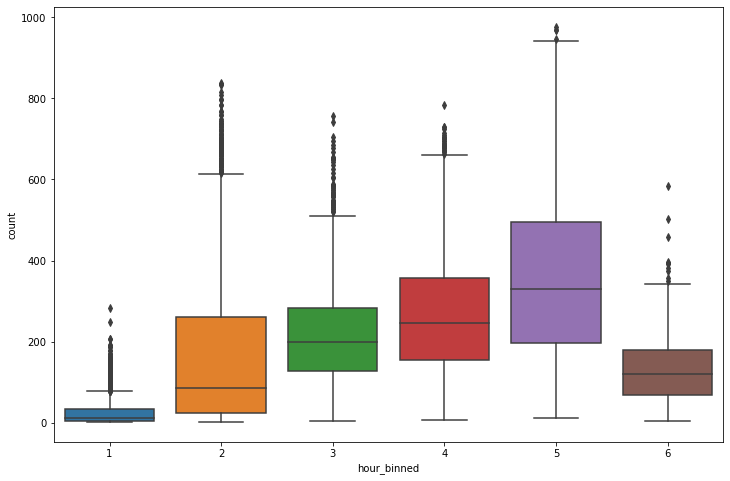

In [31]:
plt.figure(figsize=(12,8))
sns.boxplot(train['hour_binned'],train['count'])

In [32]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,day,hour_binned
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,2,1
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,2,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,2,1
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,2,1
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,2,1


In [33]:
#dropping casual and registered columns
train=train.drop(['casual','registered'],axis=1)

In [34]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,day,hour_binned
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,2,1
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,2,1
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,2,1
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,2,1
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,2,1


In [35]:
test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,day,hour_binned
0,1,0,1,1,10.66,11.365,56,26.0027,2011,4,1
1,1,0,1,1,10.66,13.635,56,0.0000,2011,4,1
2,1,0,1,1,10.66,13.635,56,0.0000,2011,4,1
3,1,0,1,1,10.66,12.880,56,11.0014,2011,4,1
4,1,0,1,1,10.66,12.880,56,11.0014,2011,4,1


In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x = train.drop('count',axis=1)
y = train['count']

In [38]:
x_train,x_ev,y_train,y_ev = train_test_split(x,y,test_size=0.3)

### Model

In [39]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [40]:
pred_ev=model.predict(x_ev)
pred_ev

array([ 21.22333333, 239.95      , 354.8       , ...,  55.9145    ,
        62.03      , 364.69      ])

In [41]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val(model, x, y, cv=10)
    return pred.mean()

def print_evaluate(true,predicted):
    mae=metrics.mean_absolute_error(true,predicted)
    mse=metrics.mean_squared_error(true,predicted)
    rmse=np.sqrt(metrics.mean_squared_error(true,predicted))
    r_square = metrics.r2_score(true,predicted)
    print('Mean Absolute Error (MAE): ',mae)
    print('Mean Squared Error (MSE): ',mse)
    print('Root Mean Squared Error (RMSE):', rmse)
    print('R Square: ',r_square)

In [42]:
print('Train set evaluation: \n')
print_evaluate(y_ev,pred_ev)

Train set evaluation: 

Mean Absolute Error (MAE):  61.2917638871216
Mean Squared Error (MSE):  8764.260183902872
Root Mean Squared Error (RMSE): 93.6176275276343
R Square:  0.7318995344834035


In [43]:
#predicted count for test data
test['count']=model.predict(test)
test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,day,hour_binned,count
0,1,0,1,1,10.66,11.365,56,26.0027,2011,4,1,6.715000
1,1,0,1,1,10.66,13.635,56,0.0000,2011,4,1,7.783333
2,1,0,1,1,10.66,13.635,56,0.0000,2011,4,1,7.783333
3,1,0,1,1,10.66,12.880,56,11.0014,2011,4,1,6.538333
4,1,0,1,1,10.66,12.880,56,11.0014,2011,4,1,6.538333


In [44]:
#rounding off count to integer values
test['count']=round(test['count'],0)
test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,day,hour_binned,count
0,1,0,1,1,10.66,11.365,56,26.0027,2011,4,1,7.0
1,1,0,1,1,10.66,13.635,56,0.0000,2011,4,1,8.0
2,1,0,1,1,10.66,13.635,56,0.0000,2011,4,1,8.0
3,1,0,1,1,10.66,12.880,56,11.0014,2011,4,1,7.0
4,1,0,1,1,10.66,12.880,56,11.0014,2011,4,1,7.0
